In [1]:
# Importação de Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregando o dataset

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
# Dividindo o dataset em dados de treino e dados de teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [4]:
# Dimensionsamento de recursos

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Construção do Modelo Random Forest

from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

In [6]:
# Treinamento do Modelo Random Forest

clf_random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [7]:
# Previsão com dados específicos

idade = int(input("Digite a idade: "))
salario = float(input("Digite o salário estimado: "))

prev = clf_random.predict(sc.transform([[idade,salario]]))

prev

Digite a idade: 30
Digite o salário estimado: 87000


array([0], dtype=int64)

In [8]:
# Previsão do Modelo Random Forest nos dados de teste

previsoes_random = clf_random.predict(X_test)

In [9]:
# Resultados do Modelo Random Forest

print(np.concatenate((previsoes_random.reshape(len(previsoes_random),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [10]:
# Matriz de Confusão do Modelo Random Forest

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, previsoes_random)

array([[63,  5],
       [ 4, 28]], dtype=int64)

In [11]:
# Acurácia do Modelo Random Forest

from sklearn.metrics import accuracy_score
accuracy_score(y_test, previsoes_random)

0.91

In [12]:
# Visualizando os resultados do Modelo Random Forest nos dados de treino
'''
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max() + 10, step=0.25), np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step=0.25))
plt.contourf(X1, X2, clf_random.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red','green'))(i), label = j)
plt.title('Random Forest - Dados de Treino')
plt.xlabel('Idade')
plt.y_label('Salário Estimado')
plt.legend()
plt.show()
'''

"\nfrom matplotlib.colors import ListedColormap\nX_set, y_set = sc.inverse_transform(X_train), y_train\nX1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max() + 10, step=0.25), np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step=0.25))\nplt.contourf(X1, X2, clf_random.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap=ListedColormap(('red','green')))\nplt.xlim(X1.min(), X1.max())\nplt.ylim(X2.min(), X2.max())\nfor i, j in enumerate(np.unique(y_set)):\n    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red','green'))(i), label = j)\nplt.title('Random Forest - Dados de Treino')\nplt.xlabel('Idade')\nplt.y_label('Salário Estimado')\nplt.legend()\nplt.show()\n"

In [13]:
# Visualizando os resultados do Modelo Random Forest nos dados de teste
'''
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max() + 10, step=0.25), np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step=0.25))
plt.contourf(X1, X2, clf_random.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red','green'))(i), label = j)
plt.title('Random Forest - Dados de Teste')
plt.xlabel('Idade')
plt.y_label('Salário Estimado')
plt.legend()
plt.show()
'''

"\nfrom matplotlib.colors import ListedColormap\nX_set, y_set = sc.inverse_transform(X_test), y_test\nX1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max() + 10, step=0.25), np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step=0.25))\nplt.contourf(X1, X2, clf_random.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap=ListedColormap(('red','green')))\nplt.xlim(X1.min(), X1.max())\nplt.ylim(X2.min(), X2.max())\nfor i, j in enumerate(np.unique(y_set)):\n    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red','green'))(i), label = j)\nplt.title('Random Forest - Dados de Teste')\nplt.xlabel('Idade')\nplt.y_label('Salário Estimado')\nplt.legend()\nplt.show()\n"

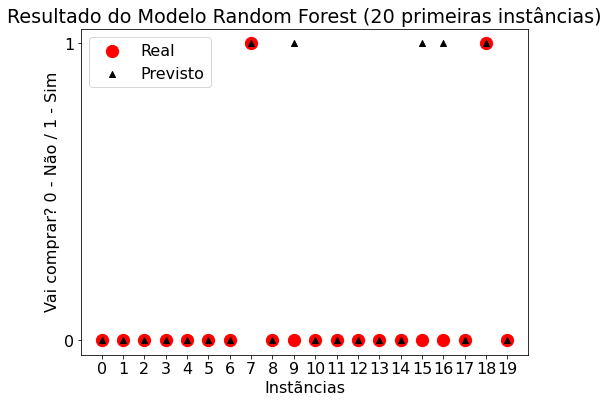

In [14]:
# Visualização dos resultados do Modelo Random Forest nos dados de teste


plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16
tamanho = 20
plt.scatter(range(0, tamanho), y_test[0:tamanho], s=150, color='red', label='Real')
plt.scatter(range(0, tamanho), previsoes_random[0:tamanho], color='black', marker='^', label='Previsto')
plt.title('Resultado do Modelo Random Forest ({} primeiras instâncias)'.format(tamanho))
plt.xlabel('Instãncias')
plt.xticks(range(0, tamanho))
plt.yticks(range(0, 2))
plt.ylabel('Vai comprar? 0 - Não / 1 - Sim')
plt.legend()
plt.show()

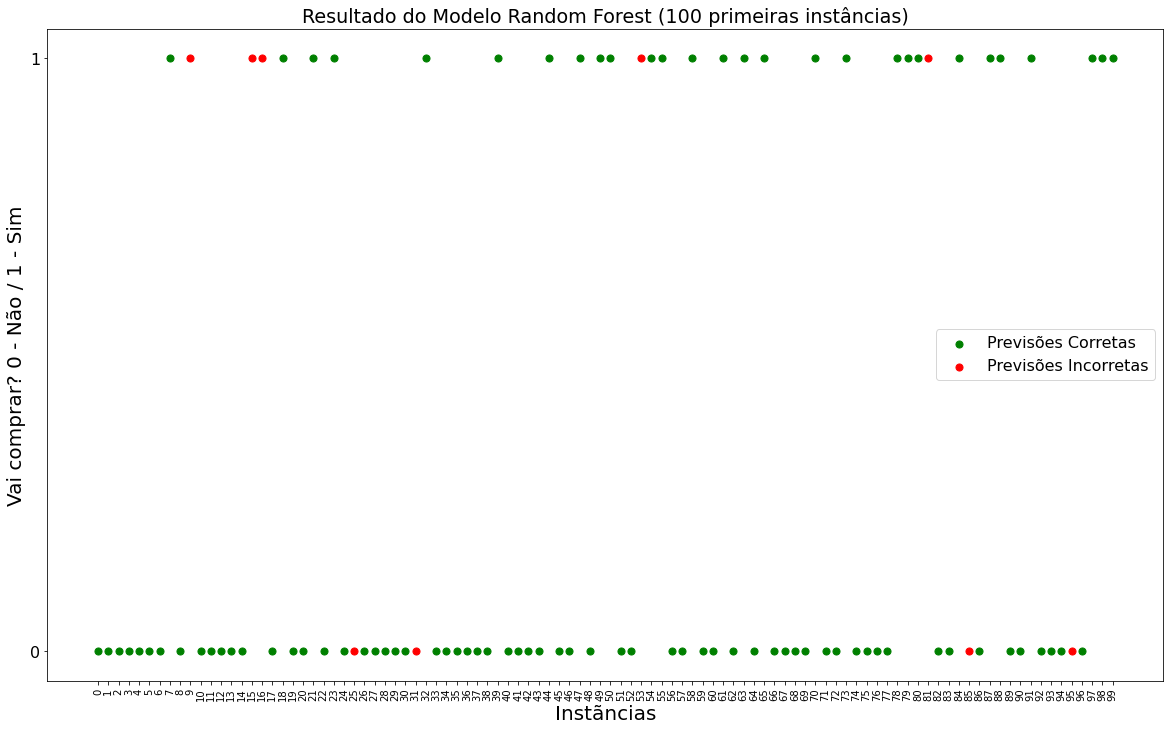

In [15]:
# Visualização dos resultados do Modelo Random Forest nos dados de teste

plt.rcParams['figure.figsize'] = (20,12)
plt.rcParams['font.size'] = 16
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 20

tamanho = 100
plt.scatter([i for i in range(0,tamanho) if previsoes_random[i] == y_test[i]], previsoes_random[previsoes_random==y_test], s=50, color='green', label='Previsões Corretas')
plt.scatter([i for i in range(0,tamanho) if previsoes_random[i] != y_test[i]], previsoes_random[previsoes_random!=y_test], s=50, color='red', label='Previsões Incorretas')
plt.title('Resultado do Modelo Random Forest ({} primeiras instâncias)'.format(tamanho))
plt.xlabel('Instãncias')
plt.xticks(range(0, tamanho))
plt.xticks(rotation=90)
plt.yticks(range(0, 2))
plt.ylabel('Vai comprar? 0 - Não / 1 - Sim')
plt.legend()
plt.show()